# Descriptive stats for Aggregate Health Change

### Gavin Qu, March 28th

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/combined_panel_data.dta')

df

,index,lf_stat,changejbstat,private,hrgpay,hrnpay,logpay,earnings,education,agghealth,pidp,wave
0,0,1,NA,0.0,6.923610,5.192707,1.934937,1200.000000,2.0,2.0,22445,d
1,1,1,0,0.0,9.037906,7.500577,2.201428,1566.449951,2.0,2.0,22445,e
2,2,1,0,0.0,14.323737,11.193169,2.661918,2482.590088,2.0,2.0,22445,f
3,3,1,0,0.0,16.251269,10.385414,2.788171,2816.669922,2.0,2.0,22445,g
4,4,1,0,0.0,16.732056,11.539349,2.817326,2900.000000,2.0,2.0,22445,h
...,...,...,...,...,...,...,...,...,...,...,...,...
533471,533471,1,NA,1.0,25.904050,18.372375,3.254399,4489.689941,NaN,2.0,1653277290,f
533472,533472,1,0,1.0,24.040330,23.078698,3.179733,4166.669922,NaN,2.0,1653277290,g
533473,533473,1,0,1.0,28.866778,19.615682,3.362691,5003.189941,NaN,2.0,1653277290,h
533474,533474,1,NA,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1653277290,i


#### Construct new dataframe with hcond, hcondn, and jbhrs

In [11]:
import pyreadstat
# use latin-1 encoding if UTF8 does not work
wave1, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/a_indresp.dta")
wave2, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/b_indresp.dta")
wave3, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/c_indresp.dta", encoding="iso-8859-1")
wave4, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/d_indresp.dta")
wave5, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/e_indresp.dta", encoding="iso-8859-1")
wave6, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/f_indresp.dta")
wave7, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/g_indresp.dta")
wave8, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/h_indresp.dta")
wave9, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/i_indresp.dta")
wave10, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/j_indresp.dta")
wave11, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/k_indresp.dta")
wave12, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/l_indresp.dta")
wave13, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/m_indresp.dta")

df1 = pd.DataFrame(wave1)
df2 = pd.DataFrame(wave2)
df3 = pd.DataFrame(wave3)
df4 = pd.DataFrame(wave4)
df5 = pd.DataFrame(wave5)
df6 = pd.DataFrame(wave6)
df7 = pd.DataFrame(wave7)
df8 = pd.DataFrame(wave8)
df9 = pd.DataFrame(wave9)
df10 = pd.DataFrame(wave10)
df11 = pd.DataFrame(wave11)
df12 = pd.DataFrame(wave12)
df13 = pd.DataFrame(wave13)

**Filter the variable of interest**

In [36]:
#  function to include the 'wave' assignment
def select_and_rename(wave_df, wave_prefix, variables, wave_letter):
    # Select variables that exist in the current wave's DataFrame
    selected_vars = {f"{wave_prefix}_{var}": var for var in variables if f"{wave_prefix}_{var}" in wave_df.columns}

    # Include 'pidp'
    if 'pidp' in wave_df.columns:
        selected_vars['pidp'] = 'pidp'

    # Add the 'wave' column with the specified wave letter
    wave_df['wave'] = wave_letter
    selected_vars['wave'] = 'wave'

    # Select and rename the existing columns
    selected_columns = list(selected_vars.keys())
    return wave_df[selected_columns].rename(columns=selected_vars)

# List of all possible 'hcond' and 'hcondn' variables
all_possible_vars = ['jbhrs', 'jbot'] + [f'hcond{i}' for i in range(1, 23)] + [f'hcondn{i}' for i in range(1, 23)]

# Apply the function to each wave DataFrame
df1_selected = select_and_rename(df1, 'a', all_possible_vars, 'a')
df2_selected = select_and_rename(df2, 'b', all_possible_vars, 'b')
df3_selected = select_and_rename(df3, 'c', all_possible_vars, 'c')
df4_selected = select_and_rename(df4, 'd', all_possible_vars, 'd')
df5_selected = select_and_rename(df5, 'e', all_possible_vars, 'e')
df6_selected = select_and_rename(df6, 'f', all_possible_vars, 'f')
df7_selected = select_and_rename(df7, 'g', all_possible_vars, 'g')
df8_selected = select_and_rename(df8, 'h', all_possible_vars, 'h')
df9_selected = select_and_rename(df9, 'i', all_possible_vars, 'i')
df10_selected = select_and_rename(df10, 'j', all_possible_vars, 'j')
df11_selected = select_and_rename(df11, 'k', all_possible_vars, 'k')
df12_selected = select_and_rename(df12, 'l', all_possible_vars, 'l')
df13_selected = select_and_rename(df13, 'm', all_possible_vars, 'm')

# Now concatenate all the selected wave DataFrames into a single DataFrame
all_waves_df = pd.concat(
    [df1_selected, df2_selected, df3_selected, df4_selected, df5_selected, 
     df6_selected, df7_selected, df8_selected, df9_selected, df10_selected, 
     df11_selected, df12_selected, df13_selected], 
    ignore_index=True, 
    sort=False
)
# Proceed with merging all_waves_df with your main DataFrame
df_combined_hcond = df.merge(all_waves_df, on=['pidp', 'wave'], how='left')
# Drop the 'index' column
df_combined_hcond = df_combined_hcond.drop('index', axis=1)

In [42]:
print(list(df_combined_hcond))

['lf_stat', 'changejbstat', 'private', 'hrgpay', 'hrnpay', 'logpay', 'earnings', 'education', 'agghealth', 'pidp', 'wave', 'jbhrs', 'jbot', 'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 'hcond17', 'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 'hcondn17', 'hcond18', 'hcondn18', 'hcond19', 'hcondn19', 'hcondn20', 'hcond21', 'hcond22']


In [45]:
# Filter and display to show only columns with NaNs
nan_columns = nan_counts[nan_counts > 0]

print(nan_columns)

private      290456
hrgpay       287234
hrnpay       287234
logpay       287234
earnings     291463
education      7867
agghealth      1103
hcond1        54569
hcond2        54569
hcond3        54569
hcond4        54569
hcond5        54569
hcond6        54569
hcond7        54569
hcond8        54569
hcond9       178165
hcond10       54569
hcond11       54569
hcond12       54569
hcond13       54569
hcond14       54569
hcond15       54569
hcond16       54569
hcond17      178165
hcondn1      174590
hcondn2      174590
hcondn3      174590
hcondn4      174590
hcondn5      174590
hcondn6      174590
hcondn7      174590
hcondn8      174590
hcondn9      174590
hcondn10     174590
hcondn11     174590
hcondn12     174590
hcondn13     174590
hcondn14     174590
hcondn15     174590
hcondn16     174590
hcondn17     174590
hcond18      247166
hcondn18     370762
hcond19      292358
hcondn19     415954
hcondn20     415954
hcond21      409880
hcond22      437878
dtype: int64


In [61]:
# Convert df_combined into dta file
df_combined_hcond.to_stata("df_hcond.dta")

#### Descriptive Stats
1.	Pay density plot split by health status
2.	Hours worked density plot split by health status
3.  Hours of OT density plot
4.	Labour force status histogram split by health status

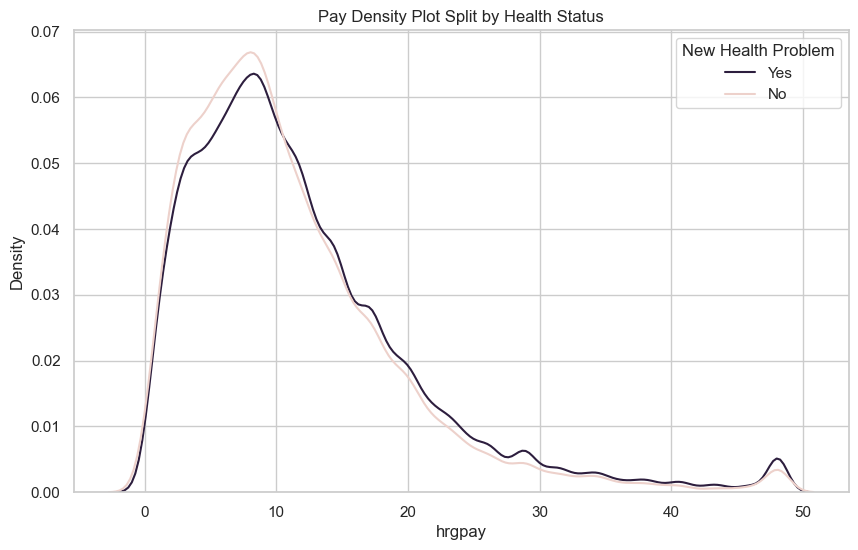

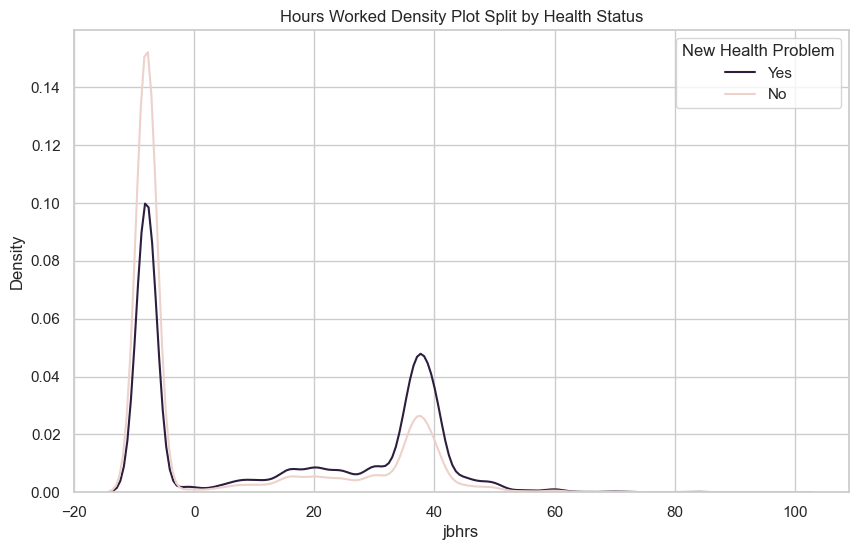

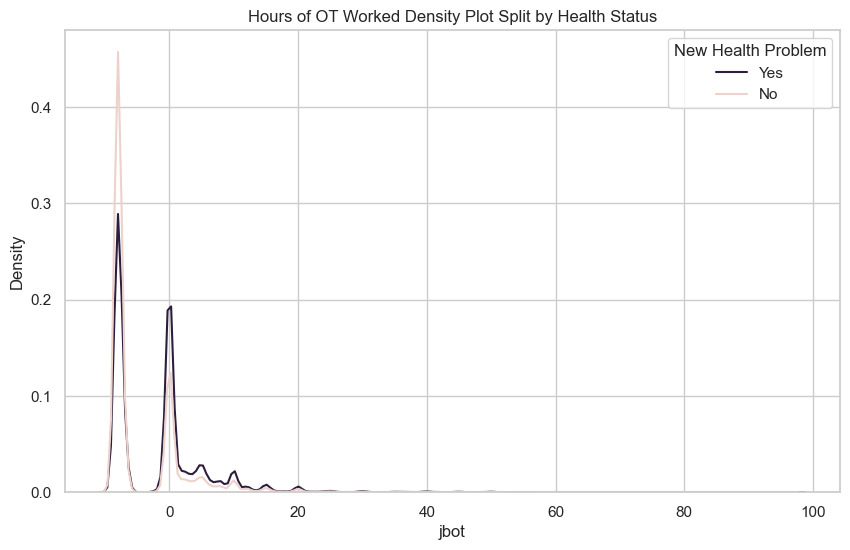

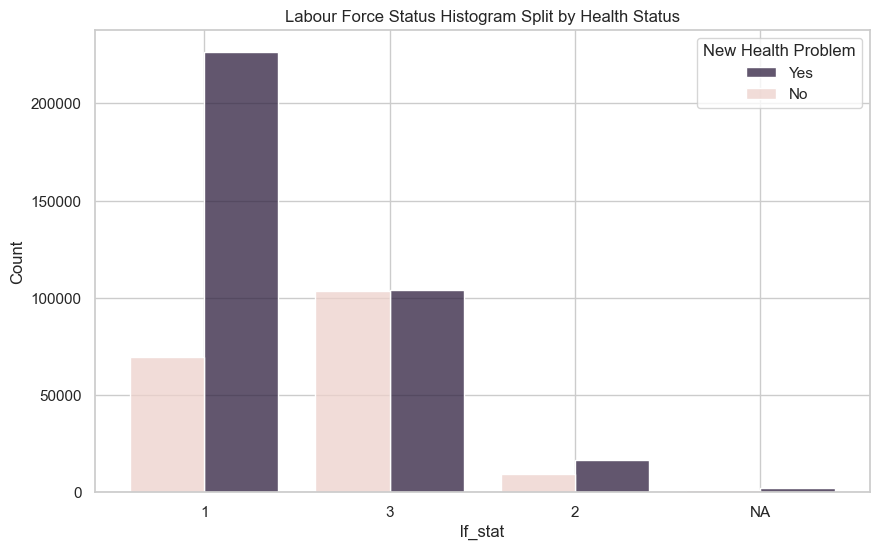

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a map for the agghealth values to their meanings
health_status_labels = {1: 'Yes (New Health Problem)', 2: 'No (No New Health Problem)'}

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Pay Density Plot Split by Health Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined_hcond, x='hrgpay', hue='agghealth', common_norm=False)
plt.title('Pay Density Plot Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()

# Hours Worked Density Plot Split by Health Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined_hcond, x='jbhrs', hue='agghealth', common_norm=False)
plt.title('Hours Worked Density Plot Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()

# Hours OT Worked Density Plot Split by Health Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined_hcond, x='jbot', hue='agghealth', common_norm=False)
plt.title('Hours of OT Worked Density Plot Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()

# Labour Force Status Histogram Split by Health Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined_hcond, x='lf_stat', hue='agghealth', multiple="dodge", shrink=.8)
plt.title('Labour Force Status Histogram Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()

### Additional plots

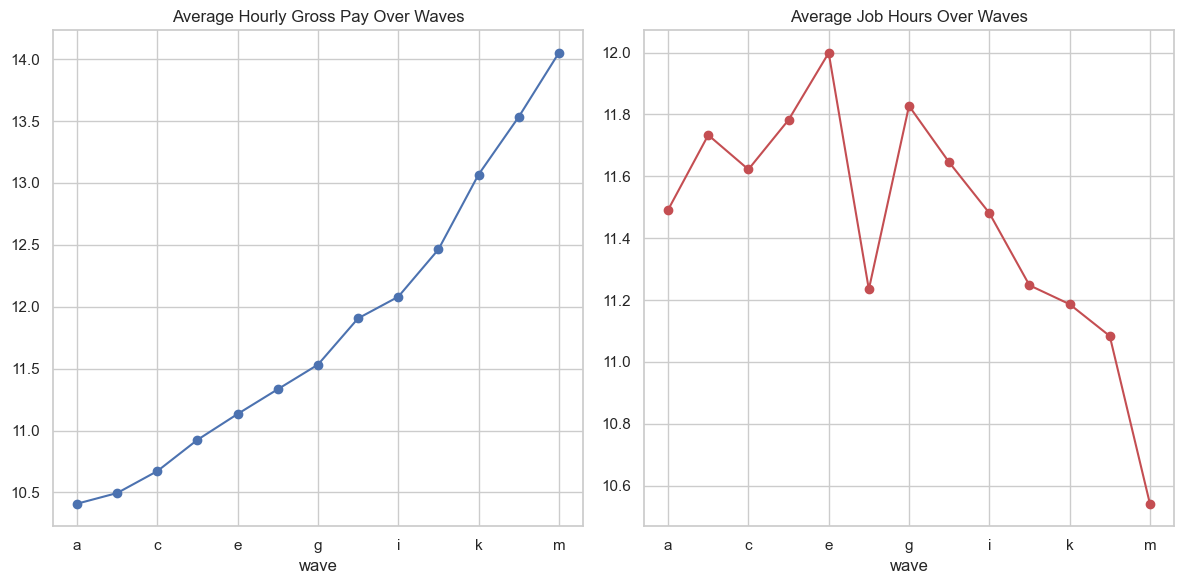

In [54]:
import matplotlib.pyplot as plt

# Group by 'wave' and calculate the mean of 'hrgpay' and 'jbhrs'
average_per_wave = df_combined_hcond.groupby('wave')[['hrgpay', 'jbhrs']].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for average hourly gross pay
plt.subplot(1, 2, 1)
average_per_wave['hrgpay'].plot(kind='line', marker='o', color='b', title='Average Hourly Gross Pay Over Waves')

# Plot for average job hours
plt.subplot(1, 2, 2)
average_per_wave['jbhrs'].plot(kind='line', marker='o', color='r', title='Average Job Hours Over Waves')

plt.tight_layout()
plt.show()

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_1019/3112811046.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_earnings_by_education.index, y=average_earnings_by_education.values, palette="viridis")


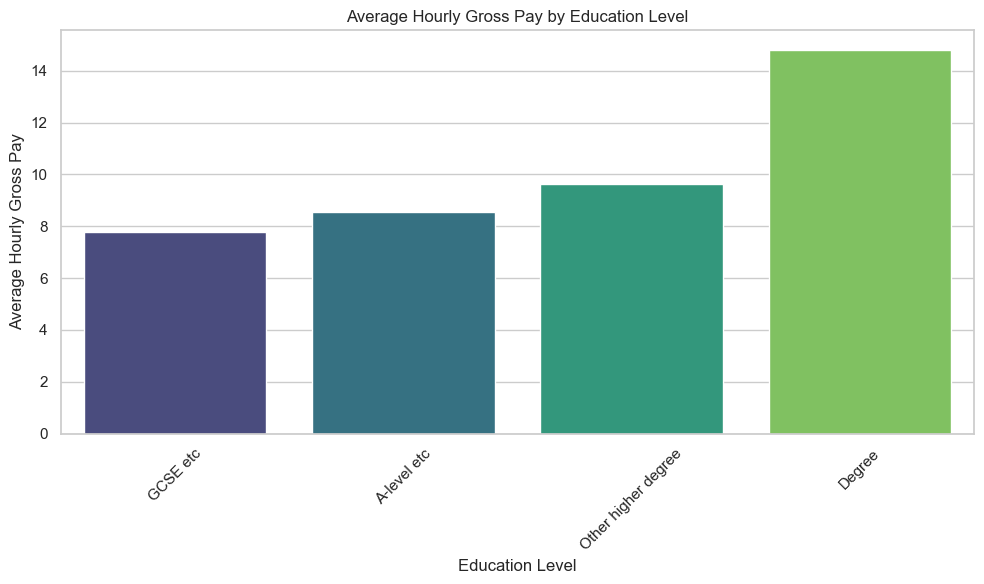

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping education codes to labels
education_map = {
    -9: 'Missing', 
    -8: 'Inapplicable', 
    1: 'Degree', 
    2: 'Other higher degree',
    3: 'A-level etc',
    4: 'GCSE etc',
    5: 'Other qualification',
    9: 'No qualification'
}

# Apply the mapping to the education column
df_combined_hcond['education_label'] = df_combined_hcond['education'].map(education_map)

# Exclude missing and inapplicable data for the plot
plot_data = df_combined_hcond[df_combined_hcond['education'].isin([1, 2, 3, 4, 5, 9])]

# Calculate the average earnings or hrgpay for each education group
average_earnings_by_education = plot_data.groupby('education_label')['hrgpay'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_earnings_by_education.index, y=average_earnings_by_education.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Average Hourly Gross Pay by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Hourly Gross Pay')
plt.tight_layout()
plt.show()

In [80]:
df_hcond = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/df_hcond.dta')

**To understand the distribution of key variables**

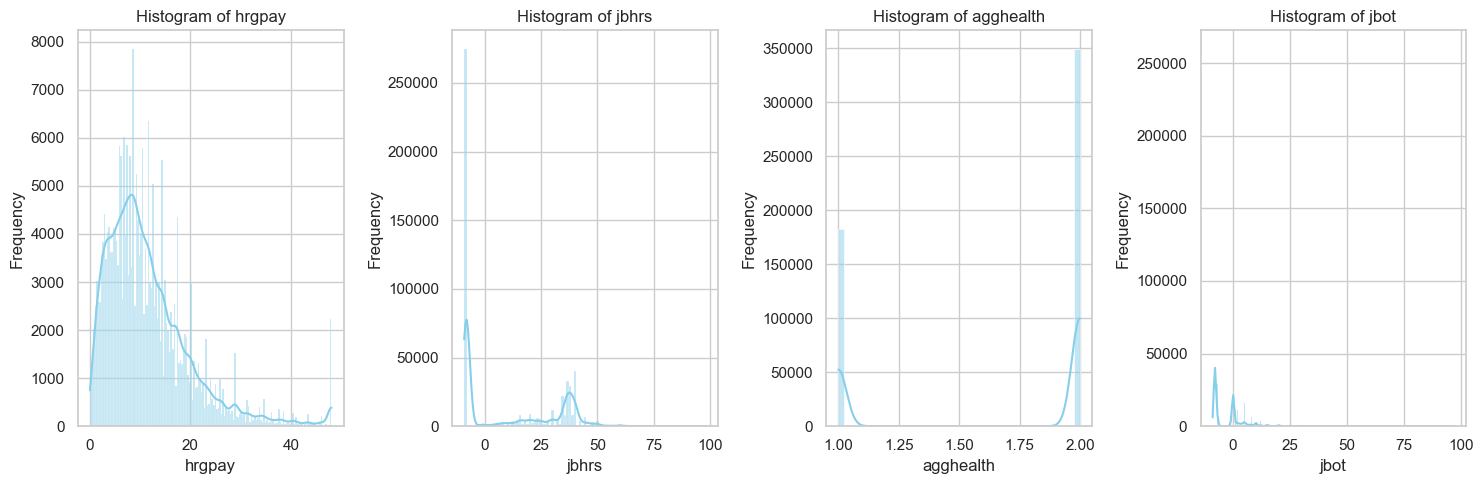

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# List of key variables
key_variables = ['hrgpay', 'jbhrs', 'agghealth', 'jbot']

# Creating histograms for each variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(key_variables):
    plt.subplot(1, len(key_variables), i+1)
    sns.histplot(df_hcond[var], kde=True, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Check for missing value**

In [ ]:
import pandas as pd

# Calculate the number of missing values for each column
missing_values_count = df_hcond.isna().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (df_hcond.isna().sum() / len(df_hcond)) * 100

# Combine the counts and percentages into a DataFrame for better visualization
missing_data_analysis = pd.DataFrame({'Number of Missing Values': missing_values_count, 
                                      'Percentage of Missing Values': missing_values_percentage})

# Sort the DataFrame based on the percentage of missing values
missing_data_analysis.sort_values(by='Percentage of Missing Values', ascending=False, inplace=True)

# Display the analysis results
print(missing_data_analysis)


## Robustness Check

1. Create Aggregate Health Status Measure: For each individual in each wave, determine whether they have any health conditions (as indicated by the hcond variables).

2. Track Year-to-Year Changes: Create a variable that indicates whether there is a change in the health status compared to the previous wave.

3. Compare with Newly Diagnosed Conditions (hcondn variables): Analyze how the aggregate health status measure compares with the newly diagnosed conditions in later waves.



In [73]:
# Identify which hcond and hcondn columns are in the DataFrame
existing_hcond_columns = [col for col in df_hcond.columns if 'hcond' in col]

# Adjust the list of variables based on what exists in the DataFrame
hcond_variables = [col for col in existing_hcond_columns if 'hcondn' not in col]
hcondn_variables = [col for col in existing_hcond_columns if 'hcondn' in col]

# Step 1: Create Aggregate Health Status Measure
df_hcond['aggregate_health_status'] = df_hcond[hcond_variables].any(axis=1).astype(int)

# Step 2: Track Year-to-Year Changes
# Sort by individual identifier (pidp) and wave
df_hcond.sort_values(by=['pidp', 'wave'], inplace=True)

# Create a lagged version of the aggregate health status measure
df_hcond['prev_health_status'] = df_hcond.groupby('pidp')['aggregate_health_status'].shift(1)

# Create a variable to indicate change in health status (1 if changed, 0 otherwise)
df_hcond['health_status_change'] = (df_hcond['aggregate_health_status'] != df_hcond['prev_health_status']).astype(int)

# Step 3: Compare with hcondn Variables
# Create an aggregate measure for newly diagnosed conditions
df_hcond['newly_diagnosed'] = df_hcond[hcondn_variables].any(axis=1).astype(int)

Descriptive stats for health variable

In [78]:
# Descriptive statistics for the relevant variables
descriptive_stats = df_hcond[['agghealth', 'prev_health_status', 'health_status_change', 'newly_diagnosed']].describe()
print(descriptive_stats)

           agghealth  prev_health_status  health_status_change  \
count  532373.000000       444128.000000         533476.000000   
mean        1.656019            0.051708              0.212437   
std         0.475035            0.221437              0.409033   
min         1.000000            0.000000              0.000000   
25%         1.000000            0.000000              0.000000   
50%         2.000000            0.000000              0.000000   
75%         2.000000            0.000000              0.000000   
max         2.000000            1.000000              1.000000   

       newly_diagnosed  
count    533476.000000  
mean          0.071402  
std           0.257495  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000  


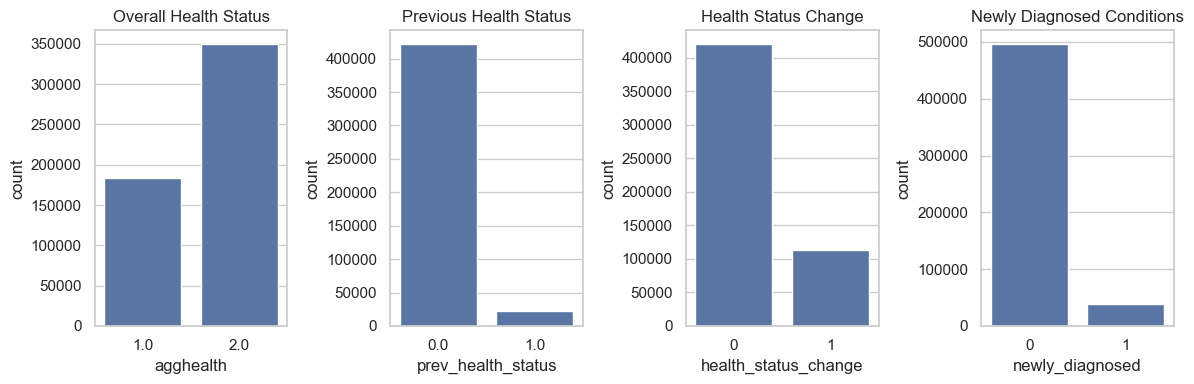

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
sns.countplot(x='agghealth', data=df_hcond)
plt.title('Overall Health Status')

plt.subplot(1, 4, 2)
sns.countplot(x='prev_health_status', data=df_hcond)
plt.title('Previous Health Status')

plt.subplot(1, 4, 3)
sns.countplot(x='health_status_change', data=df_hcond)
plt.title('Health Status Change')

plt.subplot(1, 4, 4)
sns.countplot(x='newly_diagnosed', data=df_hcond)
plt.title('Newly Diagnosed Conditions')

plt.tight_layout()
plt.show()

**T-test using health status change and hourly pay:**

In [79]:
from scipy.stats import ttest_ind

# Group data based on health status change
group1 = df_hcond[df_hcond['health_status_change'] == 0]['hrgpay']
group2 = df_hcond[df_hcond['health_status_change'] == 1]['hrgpay']

# Perform t-test
t_stat, p_value = ttest_ind(group1.dropna(), group2.dropna())

print("T-test results:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-test results:
T-statistic: 42.19961441540017, P-value: 0.0


**Redo plot 1,2, and 4 using aggregate health change**

In agg_health, 1 is yes to any long-standing physical or mental impairment, illness or disability and 2 is no. 

In [81]:
df_hcond = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/df_hcond.dta')

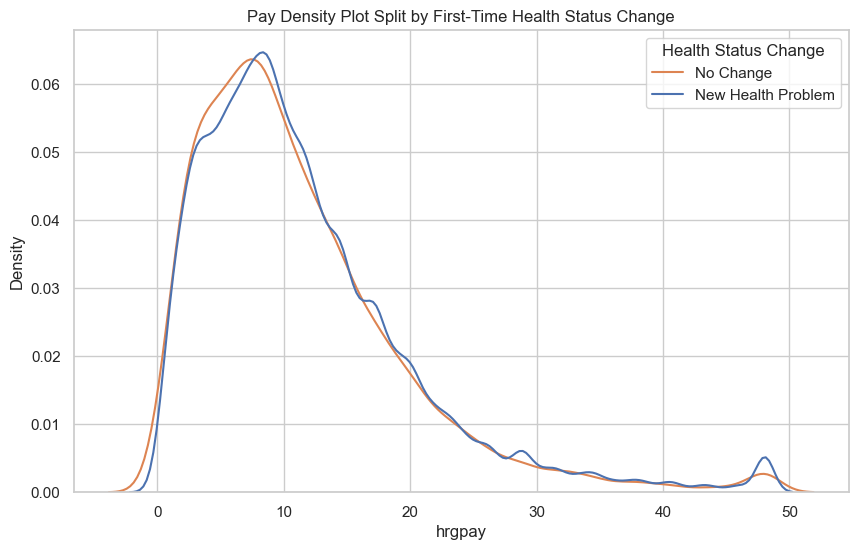

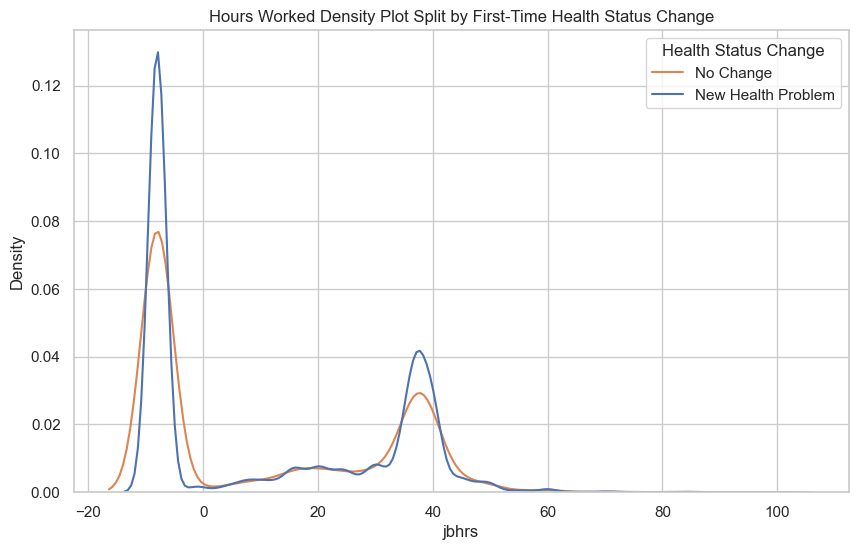

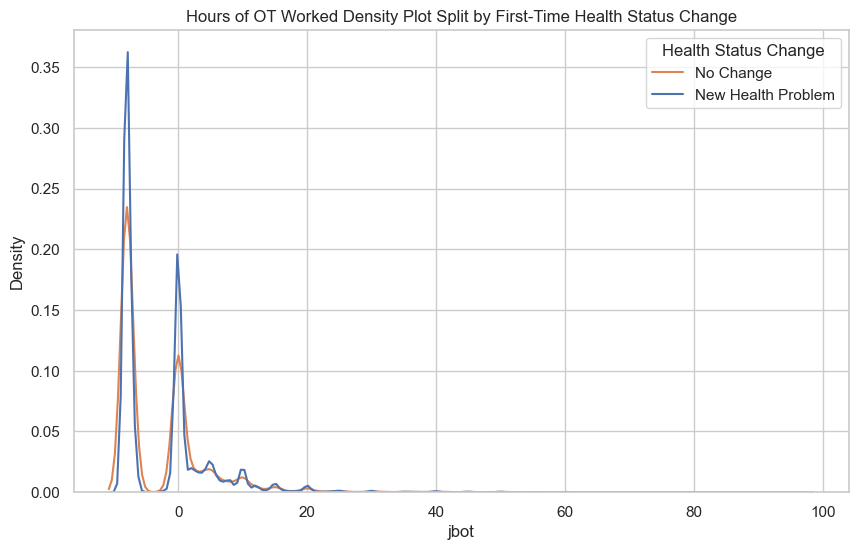

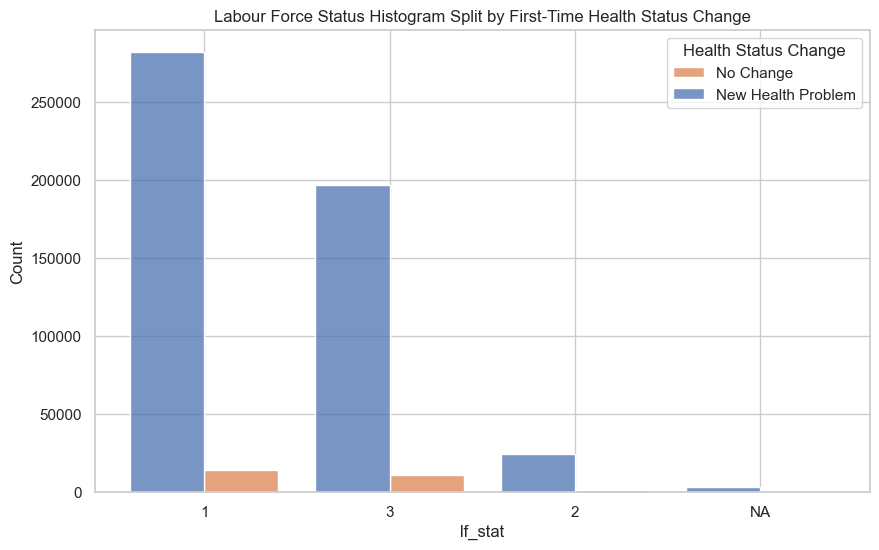

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Avoid double counting these with existing conditions across waves 
# Creating the lagged version of agghealth
df_hcond['prev_agghealth'] = df_hcond.groupby('pidp')['agghealth'].shift(1)

# Identifying new health conditions
df_hcond['health_status_change'] = ((df_hcond['agghealth'] == 1) & (df_hcond['prev_agghealth'] == 2)).astype(int)

# Marking only the first occurrence of a health status change for each individual
df_hcond['first_health_change'] = df_hcond.groupby('pidp')['health_status_change'].cumsum()

# Considering only the first change as relevant
df_hcond['health_status_change'] = (df_hcond['first_health_change'] == 1) & (df_hcond['health_status_change'] == 1)
df_hcond['health_status_change'] = df_hcond['health_status_change'].astype(int)

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Pay Density Plot Split by First-Time Health Status Change
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_hcond, x='hrgpay', hue='health_status_change', common_norm=False)
plt.title('Pay Density Plot Split by First-Time Health Status Change')
plt.legend(title='Health Status Change', labels=['No Change', 'New Health Problem'])
plt.show()

# Hours Worked Density Plot Split by First-Time Health Status Change
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_hcond, x='jbhrs', hue='health_status_change', common_norm=False)
plt.title('Hours Worked Density Plot Split by First-Time Health Status Change')
plt.legend(title='Health Status Change', labels=['No Change', 'New Health Problem'])
plt.show()

# Hours OT Worked Density Plot Split by First-Time Health Status Change
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_hcond, x='jbot', hue='health_status_change', common_norm=False)
plt.title('Hours of OT Worked Density Plot Split by First-Time Health Status Change')
plt.legend(title='Health Status Change', labels=['No Change', 'New Health Problem'])
plt.show()

# Labour Force Status Histogram Split by First-Time Health Status Change
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hcond, x='lf_stat', hue='health_status_change', multiple="dodge", shrink=.8)
plt.title('Labour Force Status Histogram Split by First-Time Health Status Change')
plt.legend(title='Health Status Change', labels=['No Change', 'New Health Problem'])
plt.show()


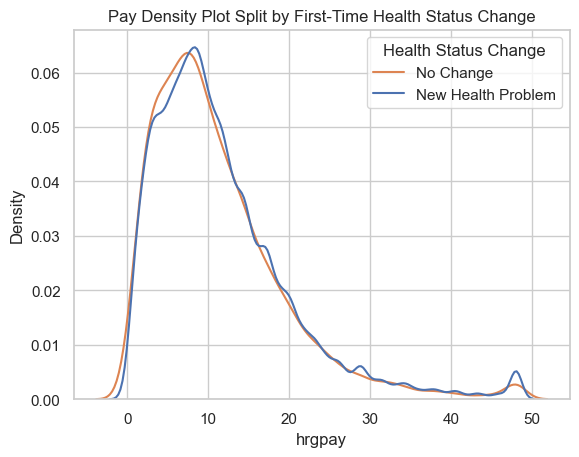

In [93]:
# Define custom labels for the legend based on the hue categories
custom_labels = ['No Change', 'New Health Problem']

# Plot
sns.kdeplot(data=df_hcond, x='hrgpay', hue='health_status_change', common_norm=False)
plt.title('Pay Density Plot Split by First-Time Health Status Change')
# Set the legend with custom labels
plt.legend(title='Health Status Change', labels=custom_labels)
plt.show()
